In [10]:
import pandas as pd

# New Section

In [11]:
import numpy as np #math functions

In [12]:
from sklearn.decomposition import PCA #import PCA function from sklearn

In [13]:
from sklearn import preprocessing #preprocessing package to scale data before using PCA

In [14]:
import matplotlib.pyplot as plt #draw graphs

In [17]:
#data = pd.read_csv("/content/drive/MyDrive/Preprocessed_Data_With_Class_Encoded.csv") #used point-and-click method to copy directory of my data
data = pd.read_csv("Preprocessed_Data_With_Class_Encoded.csv")

In [18]:
#from google.colab import files #another option to upload files for data
#files.upload()

In [19]:
#from google.colab import drive
#drive.mount('/content/drive')

In [20]:
data #preview the data

,Sample-id,Class,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-3C-AAAU-01A-11R-A41B-07,2,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA-3C-AALI-01A-11R-A41B-07,2,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA-3C-AALJ-01A-31R-A41B-07,2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA-3C-AALK-01A-11R-A41B-07,2,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA-4H-AAAK-01A-12R-A41B-07,2,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,TCGA-WT-AB44-01A-11R-A41B-07,2,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,TCGA-XX-A899-01A-11R-A36F-07,2,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,TCGA-XX-A89A-01A-11R-A36F-07,2,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,TCGA-Z7-A8R5-01A-42R-A41B-07,2,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [21]:
data.loc[:,:] #selects all columns and rows for the data 1096 rows × 20533 columns

,Sample-id,Class,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-3C-AAAU-01A-11R-A41B-07,2,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA-3C-AALI-01A-11R-A41B-07,2,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA-3C-AALJ-01A-31R-A41B-07,2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA-3C-AALK-01A-11R-A41B-07,2,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA-4H-AAAK-01A-12R-A41B-07,2,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,TCGA-WT-AB44-01A-11R-A41B-07,2,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,TCGA-XX-A899-01A-11R-A36F-07,2,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,TCGA-XX-A89A-01A-11R-A36F-07,2,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,TCGA-Z7-A8R5-01A-42R-A41B-07,2,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [22]:
Y= data['Class']

In [23]:
data.drop(labels=None,axis=1, index=None,columns=['Sample-id', 'Class'], level=None, inplace=True, errors='raise')
#data.drop(labels= 'Sample-id', axis=0, index= None, columns= 'Sample-id', level=None, inplace=False, errors= 'raise')
#data.drop('Sample-id', axis=0, inplace=True

In [24]:
data

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,0.0000,0.0,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1091,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,0.0000,0.0,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1092,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,0.0000,0.0,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1093,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,0.0000,0.0,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [25]:
#data['Class'] = labelenc.fit_transform(data['Class'])
#data['Sample-id'] = labelenc.fit_transform(data['Sample-id'])


In [26]:
#normalize data #output is an array must normalize data before scaling
normalized = preprocessing.normalize(data)
normalized

array([[0.00000000e+00, 3.95620938e-05, 3.12630572e-05, ...,
        2.85383704e-03, 4.16619957e-06, 0.00000000e+00],
       [0.00000000e+00, 1.73211059e-05, 3.24872380e-05, ...,
        7.60340074e-04, 1.73211152e-03, 0.00000000e+00],
       [1.88053983e-06, 2.41089105e-05, 1.91443352e-05, ...,
        1.05688475e-03, 7.33425052e-05, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.44733709e-05, 2.99003990e-05, ...,
        1.04553181e-03, 2.57887434e-04, 1.03565640e-06],
       [0.00000000e+00, 3.53562010e-06, 1.13907315e-05, ...,
        1.17265014e-03, 3.73158323e-04, 0.00000000e+00],
       [0.00000000e+00, 1.54862499e-05, 5.57237389e-05, ...,
        1.03919449e-03, 4.69514581e-05, 0.00000000e+00]])

In [27]:
#data[:,:].value_counts(normalize=True) this code counts the rows

In [28]:
# X is defined as feature vectors
X = normalized

# New Section

In [30]:
from sklearn.preprocessing import StandardScaler #rescale features in the same scale
x_std = StandardScaler().fit_transform(X)

In [31]:
# X is defined as feature vectors
#X = data[',:']

In [32]:
x_std.shape #X would be the data and this obtains the dimensions as # of rows,# of columns

(1095, 20531)

In [33]:
Y.shape #Y would be the number of patients so # of rows

(1095,)

In [35]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00091408  0.0158241   0.04326598 ... -0.02746536  0.00432264
  -0.00644852]
 [ 0.0158241   1.00091408  0.60635552 ...  0.45821699  0.08122922
   0.00683733]
 [ 0.04326598  0.60635552  1.00091408 ...  0.27846764  0.08606759
   0.03527226]
 ...
 [-0.02746536  0.45821699  0.27846764 ...  1.00091408  0.14619694
   0.01674672]
 [ 0.00432264  0.08122922  0.08606759 ...  0.14619694  1.00091408
   0.01896068]
 [-0.00644852  0.00683733  0.03527226 ...  0.01674672  0.01896068
   1.00091408]]


In [37]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix) #get eigen vectors and values from covariance matrix from above

In [38]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [39]:
print('\nEigenvalues \n%s' %eig_vals)#this is to print out the variance number


Eigenvalues 
[1.24601031e-311+1.24598923e-311j 3.52285811e-316+1.24678401e-311j
 1.38338381e-322+1.24583847e-311j ... 0.00000000e+000+0.00000000e+000j
 0.00000000e+000+0.00000000e+000j 0.00000000e+000+0.00000000e+000j]


In [40]:
eig_vals[0] / sum(eig_vals) # Reduce dimensions to 1 dimension (if this number output is a high variance like 75%)

<ipython-input-40-9d1cfbd3b21f>:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  eig_vals[0] / sum(eig_vals) # Reduce dimensions to 1 dimension (if this number output is a high variance like 75%)


(nan+nanj)

In [42]:
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [44]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y   #creates a y-axis column 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sarah\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

Text(0.5, 1.0, 'PCA result')

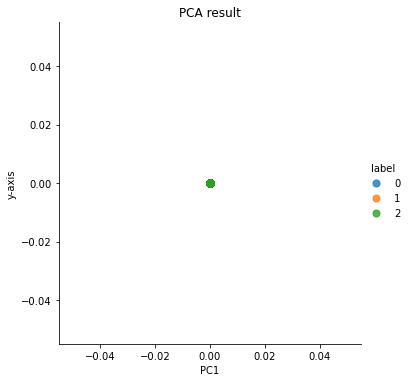

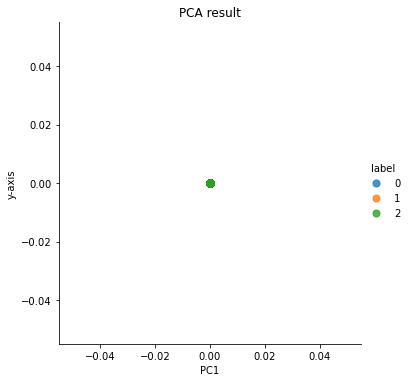

In [49]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color
plt.title('PCA result') 
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

plt.title('PCA result') #name graph title

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sarah\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'PCA result')

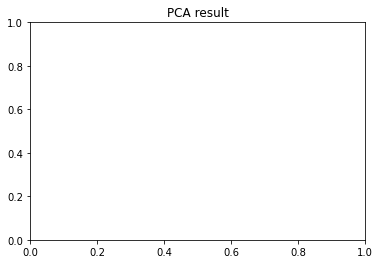

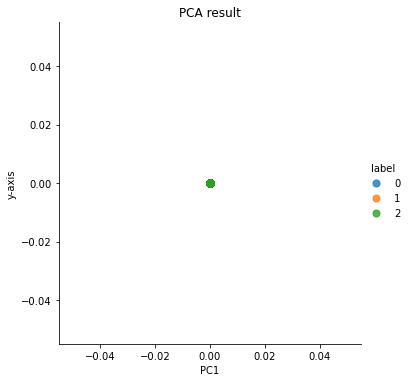

In [48]:
#

In [50]:
from sklearn import decomposition   
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


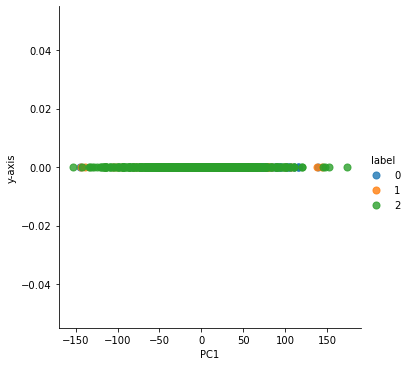

In [51]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [52]:
data.to_csv("pca_result.csv", index=False) 

In [ ]:
#data.to_csv("/content/drive/MyDrive/pca_result.csv") #saves output to google drive to prevent loss of my work

In [ ]:
# another PCA attempt using oneHotEncoder 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = OneHotEncoder()
X = enc.fit_transform([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]).toarray()

In [ ]:
data['Class'] = labelenc.fit_transform(data['Class'])
data['Sample-id'] = labelenc.fit_transform(data['Sample-id'])

In [ ]:
print(X) ##output example of X: ([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
      # [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
      # [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
      # [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [56]:
print (X_pca)  #output example of X_pca: array([[-0.70710678,  0.79056942,  0.70710678],
      # [ 1.14412281, -0.79056942,  0.43701602],
      # [-1.14412281, -0.79056942, -0.43701602],
      # [ 0.70710678,  0.79056942, -0.70710678]])

[[-0.1382762   0.25383224 -0.01432142]
 [ 0.13934374  0.04954178 -0.17273906]
 [ 0.15633149 -0.03863186 -0.16591182]
 ...
 [ 0.37831918 -0.03324101  0.16036581]
 [-0.27325042 -0.17337949  0.03307289]
 [-0.09237916 -0.01376464 -0.23148879]]


In [58]:
#Another way of using pca but using 95% variance
pip install pca 
from pca import pca 
model = pca(n_components=0.95) # reduce the data to components explaining 95% of the variance

#model = pca(n_components=3) #reduce the data towards 3 PCs

ModuleNotFoundError: No module named 'pca'

In [ ]:
results = model.fit_transform(data) #fit transform

In [ ]:
#scatter plot
fig, ax = model.scatter()

In [ ]:
#Biplot to plot loadings
fig, ax = model.biplot(n_feat=4)

In [ ]:
#3d plots
fig, ax model.scatter3d()
fig, ax = model.biplot3d(n_feat=2)

In [ ]:
# Normalize PCA by normalizing out 1st component and return data
model = pca()
Xnew = model.norm(X, pcexclude=[1])

print(Xnorm.shape)#shows dimensions

In [ ]:
# PC1 is dropped and the PC2 has become PC1, etc
ax = pca.biplot(model)

In [ ]:
import numpy as np
    import pandas as pd
    from pca import pca
#Really unsure how to do this but this is an example of creating a dataset w/features w/decreasing variance 
    # need to extract feature f1 as most important, followed by f2 etc
    f1=np.random.randint(0,100,250)
    f2=np.random.randint(0,50,250)
    f3=np.random.randint(0,25,250)
    f4=np.random.randint(0,10,250)
    f5=np.random.randint(0,5,250)
    f6=np.random.randint(0,4,250)
    f7=np.random.randint(0,3,250)
    f8=np.random.randint(0,2,250)
    f9=np.random.randint(0,1,250)

    
    X = np.c_[f1,f2,f3,f4,f5,f6,f7,f8,f9] # Combine into dataframe
    X = pd.DataFrame(data=X, columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9'])

    model = pca()
    # Fit transform
    out = model.fit_transform(X)

In [ ]:
# Print top features 
    print(out['topfeat'])
#Output example
    #     PC      feature
    # 0  PC1      f1
    # 1  PC2      f2
    # 2  PC3      f3
    # 3  PC4      f4
    # 4  PC5      f5
    # 5  PC6      f6
    # 6  PC7      f7
    # 7  PC8      f8
    # 8  PC9      f9

In [ ]:
 model.plot() #plot

In [ ]:
ax = model.biplot(n_feat=10, legend=False) #biplot

In [ ]:
  ax = model.biplot3d(n_feat=10, legend=False) #3d plot

In [ ]:
#Trying to extract outliers and plot the outliers
#using the hotellings T2 test-> compute the chi-square tests across the top n_components (default is PC1 to PC5)
#expected to see highest variance (and thus the outliers) 
# output is P-value matrix (samples x PCs)=>P-values per sample combined using fishers method
#to find outliers and rank from strongest to weakest 
#The cut-off of setting an outlier is set w/ alpha (default: 0.05)
from pca import pca
import pandas as pd
import numpy as np

# Create dataset with 100 samples
X = np.array(np.random.normal(0, 1, 500)).reshape(100, 5)
# Create 5 outliers
outliers = np.array(np.random.uniform(5, 10, 25)).reshape(5, 5)
# Combine data
X = np.vstack((X, outliers))

# Initialize model. Alpha is the threshold for the hotellings T2 test to determine outliers in the data.
model = pca(alpha=0.05)

# Fit transform
out = model.fit_transform(X)

# [pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
# [pca] >Column labels are auto-completed.
# [pca] >Row labels are auto-completed.
# [pca] >Fitting using PCA..
# [pca] >Computing loadings and PCs..
# [pca] >Computing explained variance..
# [pca] >Number of components is [4] that covers the [95.00%] explained variance.
# [pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
# [pca] >Outlier detection using SPE/DmodX with n_std=[2]

In [ ]:
print(out['outliers'])
#output example of what it should look like
#            y_proba      y_score  y_bool  y_bool_spe  y_score_spe
# 1.0   9.799576e-01     3.060765   False       False     0.993407
# 1.0   8.198524e-01     5.945125   False       False     2.331705
# 1.0   9.793117e-01     3.086609   False       False     0.128518
# 1.0   9.743937e-01     3.268052   False       False     0.794845
# 1.0   8.333778e-01     5.780220   False       False     1.523642
# ..             ...          ...     ...         ...          ...
# 1.0   6.793085e-11    69.039523    True        True    14.672828
# 1.0  2.610920e-291  1384.158189    True        True    16.566568
# 1.0   6.866703e-11    69.015237    True        True    14.936442
# 1.0  1.765139e-292  1389.577522    True        True    17.183093
# 1.0  1.351102e-291  1385.483398    True        True    17.319038

In [ ]:
model.biplot(legend=True, SPE=True, hotellingt2=True)
model.biplot3d(legend=True, SPE=True, hotellingt2=True)

In [ ]:
# only the scatter plots
model.scatter(legend=True, SPE=True, hotellingt2=True)
model.scatter3d(legend=True, SPE=True, hotellingt2=True)

In [ ]:
# Selecting the outliers
Xoutliers = X[out['outliers']['y_bool'],:]

# Selecting the other set
Xnormal = X[~out['outliers']['y_bool'],:]

In [ ]:
#outliers detected using hotelling T2, SPE/DmodX functionality.
import pca
outliers_hot = pca.hotellingsT2(out['PC'].values, alpha=0.05)
outliers_spe = pca.spe_dmodx(out['PC'].values, n_std=2)

In [ ]:
from pca import pca
model = pca()

# Example with DataFrame
X = np.array(np.random.normal(0, 1, 500)).reshape(100, 5)
X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]).astype(str))

out = model.fit_transform(X)

# plot w/parameters and only directions 
model.biplot(cmap=None, label=False, legend=False)

In [ ]:
from pca import pca
# Initialize
model = pca()

# Example with DataFrame
X = np.array(np.random.normal(0, 1, 500)).reshape(100, 5)
X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]).astype(str))

# Fit transform
out = model.fit_transform(X)

# Make plot with parameters.
fig, ax = model.biplot(visible=False)

# Set the figure to True 
fig.set_visible(True)
fig


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from pca import pca

model = pca(n_components=2, normalize=True)
# random samples across the classes
idx=[0,1,2,3,4,50,51,52,53,54,55,100,101,102,103,104,105]
X_unseen = X.iloc[idx, :]

# Label original dataset to make sure the check which samples are overlapping
X.index.values[idx]=3

# Fit transform
model.fit_transform(X)

# Transform new "unseen" data. Note that these datapoints are not really unseen as they are readily fitted above.
# But for the sake of example, you can see that these samples will be transformed exactly on top of the orignial ones.
PCnew = model.transform(X_unseen)

# Plot PC space
model.scatter()
# new "unseen" samples on top of the existing space are plotted
plt.scatter(PCnew.iloc[:, 0], PCnew.iloc[:, 1], marker='x')